<a href="https://colab.research.google.com/github/Abonty18/ML-lab/blob/main/190042118_Labiba_Farah_lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


%matplotlib inline
## Import the dataset

data = pd.read_csv('/content/Real_estate.csv')
data.head()

,Trans date,House age,Distance station,No of stores,Latitude,Longitude,House Price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


                  Trans date  House age  Distance station  No of stores  \
Trans date          1.000000   0.017549          0.060880      0.009635   
House age           0.017549   1.000000          0.025622      0.049593   
Distance station    0.060880   0.025622          1.000000     -0.602519   
No of stores        0.009635   0.049593         -0.602519      1.000000   
Latitude            0.035058   0.054420         -0.591067      0.444143   
Longitude          -0.041082  -0.048520         -0.806317      0.449099   
House Price         0.087491  -0.210567         -0.673613      0.571005   

                  Latitude  Longitude  House Price  
Trans date        0.035058  -0.041082     0.087491  
House age         0.054420  -0.048520    -0.210567  
Distance station -0.591067  -0.806317    -0.673613  
No of stores      0.444143   0.449099     0.571005  
Latitude          1.000000   0.412924     0.546307  
Longitude         0.412924   1.000000     0.523287  
House Price       0.546307  

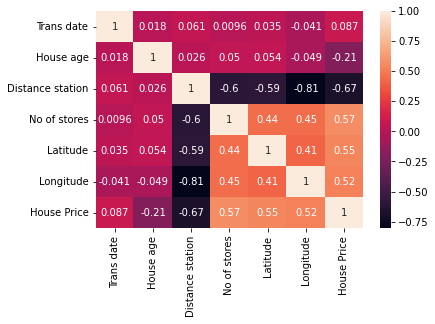

In [ ]:
# correlations = data.corr()
print(data.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(),  annot=True)
  
# displaying heatmap
plt.show()

TASK2

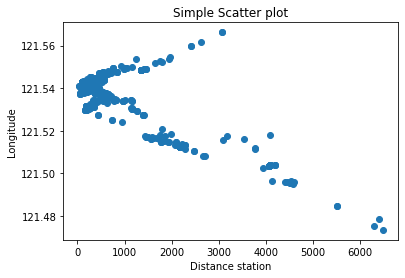

In [ ]:
x = data['Distance station'].values.reshape(-1, 1)
y = data['Longitude'].values.reshape(-1, 1)

plt.scatter(x, y)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':80})
plt.title('Simple Scatter plot')
plt.xlabel('Distance station')
plt.ylabel('Longitude')
plt.show()

TASK3


In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
# features = ['Distance station']
# X = data.loc[:, features]
# y = data.loc[:, ['Longitude']]
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .80)
print(X_train) 
print(y_train) 



In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)

[121.54386963]


In [ ]:
print(regressor.coef_)

[[-9.76005077e-06]]


TASK4

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
score = regressor.predict([[9.5]])
print(score)
y_pred = regressor.predict(X_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:f}')
print(f'Mean squared error: {mse:f}')
print(f'Root mean squared error: {rmse:f}')
print("R2 score : %f" % r2_score(y_test,y_pred))


[[121.5437769]]
       Actual   Predicted
0   121.52999  121.541806
1   121.49628  121.499679
2   121.54170  121.540698
3   121.49587  121.499757
4   121.52979  121.542211
..        ...         ...
78  121.54348  121.541046
79  121.53411  121.534454
80  121.54228  121.541063
81  121.54842  121.530595
82  121.53805  121.539339

[83 rows x 2 columns]
Mean absolute error: 0.006126
Mean squared error: 0.000088
Root mean squared error: 0.009363
R2 score : 0.646952


TASK5

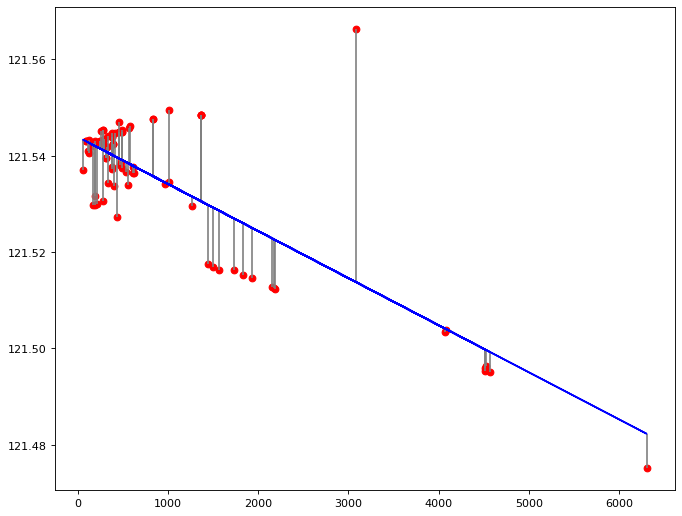

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.vlines(X_test,y_pred,y_test,color='gray')

TASK6

In [ ]:
from sklearn.metrics import mean_squared_error
SSxy=sum(X_train*y_train)-len(X_train)*X_train.mean()*y_train.mean()
SSxx=sum(np.square(X_train))-len(X_train)*((X_train.mean())**2)
B1=SSxy/SSxx
B0=y_train.mean()-B1*X_train.mean()
print(B1)
print(B0)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')
  

[-9.76005077e-06]
[121.54386963]
64.69524677897944 %


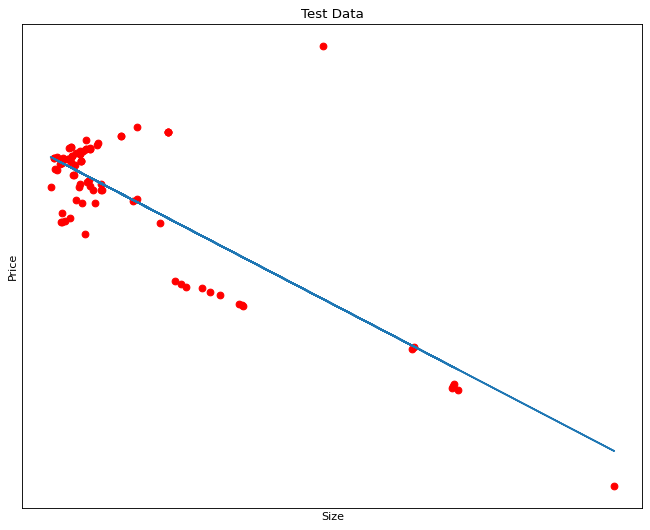

In [ ]:
plt.scatter(X_test, y_test,  color='red')
plt.title('Test Data')
plt.xlabel('Size')
plt.ylabel('Price')
plt.xticks(())
plt.yticks(())
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Plot outputs
plt.plot(X_test, regr.predict(X_test))

plt.show()


TASK7

In [ ]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(data.loc[:, data.columns != 'House Price'], data['House Price'], test_size=0.2, random_state=190042118)

regression = LinearRegression().fit(X_train_all, y_train_all)
prediction = regression.predict(X_test_all)

print(regression.coef_)
print(regression.intercept_)

MAE = mean_absolute_error(y_test_all, prediction)
MSE = mean_squared_error(y_test_all, prediction)

print(MAE)
print(MSE)

[ 4.83718508e+00 -2.98134825e-01 -4.45194895e-03  1.02269987e+00
  2.54027950e+02 -1.76343486e+01]
-13894.10293495513
6.511241501317601
83.98135652368333


TASK8

In [ ]:
regression = np.polyfit(X_train, y_train,deg=1)
prediction = np.polyval(regression, X_test)

b_0 = regression[0]
b_1 = regression[1]

plt.scatter(X_test, y_test, marker='x')
plt.plot(X_test, prediction, color='Red')

print(b_0, b_1)

TASK9


In [ ]:
def calculate_errors(X, Y):
  X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .80)
  regression = LinearRegression().fit(np.reshape(X_train.to_numpy(), (-1, 1)), y_train)
  prediction = regression.predict(np.reshape(X_test.to_numpy(), (-1, 1)))
  MAE = round(mean_absolute_error(y_test, prediction), 8)
  MSE = round(mean_squared_error(y_test, prediction), 8)
  R2 = round(r2_score(y_test, prediction), 8)
  return np.array([[MAE], [MSE], [R2]])

df = np.array([['MSE'], ['MAE'], ['R2']])
df = np.append(df, calculate_errors(data['Distance station'], data['Longitude']), axis=1)
df = np.append(df, calculate_errors(data['Distance station'], data['House Price']), axis=1)
df = np.append(df, calculate_errors(data['No of stores'], data['House Price']), axis=1)
df = np.append(df, calculate_errors(data['Distance station'], data['Latitude']), axis=1)
df = np.append(df, calculate_errors(data['House age'], data['Longitude']), axis=1)
df = np.append(df, calculate_errors(data['House age'], data['No of stores']), axis=1)


pd.DataFrame(data, columns=['Type', 'Dist-Long', 'Dist-HouseP', 'NoStores-HPrice', 'Dist-Lat', 'HAge-Long', 'HAge-NoStores'])



TASK 10

In [ ]:
b1 = 0.0
b0 = 100.0
alpha = 1
for x, y in zip(X_train, y_train):
  predicted_y = b0 + b1*x
  error = predicted_y - y
  b0 = b0 - alpha*error
  b1 = b1 - alpha*error
  print(b0, b1)

[121.51359] [21.51359]
[-48840.77315843] [-48940.77315843]
[21519893.37010983] [21519793.37010983]
[-1.37857323e+10] [-1.37857324e+10]
[1.6058145e+13] [1.6058145e+13]
[-6.22690059e+15] [-6.22690059e+15]
[1.20543144e+18] [1.20543144e+18]
[-2.23522669e+20] [-2.23522669e+20]
[8.79026591e+22] [8.79026591e+22]
[-1.19559835e+26] [-1.19559835e+26]
[1.19052351e+29] [1.19052351e+29]
[-1.38175968e+32] [-1.38175968e+32]
[5.86851577e+34] [5.86851577e+34]
[-1.00506079e+38] [-1.00506079e+38]
[3.91794707e+40] [3.91794707e+40]
[-1.59326726e+44] [-1.59326726e+44]
[1.01908529e+47] [1.01908529e+47]
[-1.88968577e+49] [-1.88968577e+49]
[9.30162484e+51] [9.30162484e+51]
[-3.46601051e+54] [-3.46601051e+54]
[3.35301857e+57] [3.35301857e+57]
[-6.28631634e+59] [-6.28631634e+59]
[8.55026402e+62] [8.55026402e+62]
[-3.17428124e+65] [-3.17428124e+65]
[1.74967588e+69] [1.74967588e+69]
[-5.57322859e+71] [-5.57322859e+71]
[2.27500027e+75] [2.27500027e+75]
[-8.88543216e+77] [-8.88543216e+77]
[3.50101399e+80] [3.5010139

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in subtract
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  
